<a href="https://colab.research.google.com/github/trunghn2003/tttnthaythoa/blob/main/svm_nsl_kdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Đầu tiên, chúng ta sẽ tải các tệp dữ liệu NSL-KDD về.

In [2]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
!wget http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.newattackstypes

--2025-08-24 08:51:40--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.94
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.94|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18115902 (17M) [application/x-gzip]
Saving to: ‘kddcup.data.gz’

kddcup.data.gz      100%[===================>]  17.28M  40.5MB/s    in 0.4s    

2025-08-24 08:51:41 (40.5 MB/s) - ‘kddcup.data.gz’ saved [18115902/18115902]

--2025-08-24 08:51:41--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.94
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.94|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  5.87MB/s    in 0.3s    

2025-08-24 08:51:41 (5.87 MB/s) - ‘kddcup.data_10_percen

Tiếp theo, chúng ta sẽ giải nén các tệp và tải dữ liệu vào pandas DataFrame. Lưu ý rằng NSL-KDD được xây dựng từ KDD Cup 99, nên tên tệp dữ liệu gốc vẫn là `kddcup.data`, `kddcup.data_10_percent`, và `corrected`.

In [3]:
import pandas as pd
import gzip

# Tên cột cho bộ dữ liệu KDD Cup 99 (áp dụng cho NSL-KDD)
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack_type", "difficulty_level"
]


# Tải dữ liệu train (kddcup.data_10_percent)
with gzip.open('kddcup.data_10_percent.gz', 'rt') as f:
    train_df = pd.read_csv(f, names=column_names)

# Tải dữ liệu test (corrected)
with gzip.open('corrected.gz', 'rt') as f:
    test_df = pd.read_csv(f, names=column_names)

# Loại bỏ cột 'difficulty_level' vì nó không có giá trị
train_df = train_df.drop('difficulty_level', axis=1)
test_df = test_df.drop('difficulty_level', axis=1)


print("Dữ liệu train:")
display(train_df.head())

print("\nDữ liệu test:")
display(test_df.head())

Dữ liệu train:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.



Dữ liệu test:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


# Mục mới

In [4]:
print("Thông tin về dữ liệu train:")
train_df.info()

print("\nThông tin về dữ liệu test:")
test_df.info()

Thông tin về dữ liệu train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              4

In [4]:
print("Thống kê mô tả cho dữ liệu train:")
display(train_df.describe(include='all'))

print("\nThống kê mô tả cho dữ liệu test:")
display(test_df.describe(include='all'))

Thống kê mô tả cho dữ liệu train:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
count,494021.000000,494021,494021,494021,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf.
freq,NaN,283602,281400,378440,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790
mean,47.979302,NaN,NaN,NaN,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,NaN
std,707.746472,NaN,NaN,NaN,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN



Thống kê mô tả cho dữ liệu test:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
count,311029.000000,311029,311029,311029,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029
unique,NaN,3,65,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf.
freq,NaN,164969,164352,248379,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164091
mean,17.902736,NaN,NaN,NaN,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,...,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693,NaN
std,407.644400,NaN,NaN,NaN,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,...,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Tiếp theo, chúng ta sẽ kiểm tra xem có giá trị thiếu trong mỗi cột của cả hai DataFrame hay không.

In [5]:
print("Kiểm tra giá trị thiếu trong dữ liệu train:")
print(train_df.isnull().sum())

print("\nKiểm tra giá trị thiếu trong dữ liệu test:")
print(test_df.isnull().sum())

Kiểm tra giá trị thiếu trong dữ liệu train:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0

In [7]:
# Tách đặc trưng (X) và nhãn (y)
X_train = train_df.drop('attack_type', axis=1)
y_train = train_df['attack_type']

X_test = test_df.drop('attack_type', axis=1)
y_test = test_df['attack_type']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (494021, 41)
Shape of y_train: (494021,)
Shape of X_test: (311029, 41)
Shape of y_test: (311029,)


In [8]:
# Tạo ánh xạ từ các loại tấn công sang 'attack' hoặc 'normal'
# Tất cả các nhãn không phải 'normal.' sẽ được gán là 'attack.'
attack_mapping = {label: 'attack.' if label != 'normal.' else 'normal.' for label in y_train.unique()}
attack_mapping.update({label: 'attack.' if label != 'normal.' else 'normal.' for label in y_test.unique()})


# Áp dụng ánh xạ cho y_train và y_test
y_train_binary = y_train.map(attack_mapping)
y_test_binary = y_test.map(attack_mapping)

print("Phân bố nhãn trong y_train_binary:")
print(y_train_binary.value_counts())

print("\nPhân bố nhãn trong y_test_binary:")
print(y_test_binary.value_counts())

Phân bố nhãn trong y_train_binary:
attack_type
attack.    396743
normal.     97278
Name: count, dtype: int64

Phân bố nhãn trong y_test_binary:
attack_type
attack.    250436
normal.     60593
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Xác định các cột phân loại
categorical_features = ['protocol_type', 'service', 'flag']

# Tạo ColumnTransformer để áp dụng OneHotEncoder chỉ cho các cột phân loại
# remainder='passthrough' giữ lại các cột số
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Áp dụng tiền xử lý cho tập train và test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (494021, 118)
Shape of X_test_encoded: (311029, 118)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder cho nhãn nhị phân train và test
y_train_encoded = label_encoder.fit_transform(y_train_binary)
y_test_encoded = label_encoder.transform(y_test_binary)

print("Phân bố nhãn sau khi mã hóa trong y_train_encoded:")
print(pd.Series(y_train_encoded).value_counts())

print("\nPhân bố nhãn sau khi mã hóa trong y_test_encoded:")
print(pd.Series(y_test_encoded).value_counts())

# Hiển thị ánh xạ
print("\nÁnh xạ nhãn:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

Phân bố nhãn sau khi mã hóa trong y_train_encoded:
0    396743
1     97278
Name: count, dtype: int64

Phân bố nhãn sau khi mã hóa trong y_test_encoded:
0    250436
1     60593
Name: count, dtype: int64

Ánh xạ nhãn:
attack.: 0
normal.: 1


In [10]:
!pip install imblearn

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Khởi tạo RandomUnderSampler
# random_state để đảm bảo kết quả có thể tái lập
rus = RandomUnderSampler(random_state=42)

# Áp dụng RandomUnderSampler cho tập train
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_encoded, y_train_encoded)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Phân bố nhãn trong y_train_resampled:")
print(pd.Series(y_train_resampled).value_counts())

Shape of X_train_resampled: (194556, 118)
Phân bố nhãn trong y_train_resampled:
0    97278
1    97278
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Fit scaler trên tập huấn luyện đã lấy mẫu lại và transform
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform tập kiểm tra đã mã hóa
X_test_scaled = scaler.transform(X_test_encoded)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (194556, 118)
Shape of X_test_scaled: (311029, 118)


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Xác định không gian tham số cho SVM
# Bắt đầu với một lưới nhỏ để thử nghiệm
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Khởi tạo mô hình SVM
svm = SVC(random_state=42)

# Khởi tạo GridSearchCV
# cv=3 nghĩa là 3-fold cross-validation
# n_jobs=-1 sử dụng tất cả các nhân CPU
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose =2)

# Thực hiện tìm kiếm trên tập huấn luyện đã được xử lý
print("Bắt đầu tìm kiếm tham số...")
grid_search.fit(X_train_scaled, y_train_resampled)

print("\nKết quả tìm kiếm tham số:")
print("Bộ tham số tốt nhất:", grid_search.best_params_)
print("Điểm accuracy tốt nhất trên tập cross-validation:", grid_search.best_score_)

# Mô hình tốt nhất sau khi tìm kiếm
best_svm_model = grid_search.best_estimator_

Bắt đầu tìm kiếm tham số...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Kết quả tìm kiếm tham số:
Bộ tham số tốt nhất: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Điểm accuracy tốt nhất trên tập cross-validation: 0.9599549744032566


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dự đoán trên tập kiểm tra
y_pred = best_svm_model.predict(X_test_scaled)

# Đánh giá mô hình
print("\nĐánh giá mô hình SVM tốt nhất trên tập kiểm tra:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test_encoded, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


Đánh giá mô hình SVM tốt nhất trên tập kiểm tra:
Accuracy: 0.9220812207221835

Ma trận nhầm lẫn:
[[227157  23279]
 [   956  59637]]

Báo cáo phân loại:
              precision    recall  f1-score   support

     attack.       1.00      0.91      0.95    250436
     normal.       0.72      0.98      0.83     60593

    accuracy                           0.92    311029
   macro avg       0.86      0.95      0.89    311029
weighted avg       0.94      0.92      0.93    311029



# Task
Save the best SVM model and the evaluation results (Accuracy, Precision, Recall, F1-score, Confusion Matrix) in a table format and an Excel file.

## Lưu mô hình svm tốt nhất

### Subtask:
Lưu mô hình SVM đã được huấn luyện tốt nhất vào một tệp.


**Reasoning**:
Save the best trained SVM model to a file using joblib.



In [ ]:
import joblib

# Save the best SVM model
joblib.dump(best_svm_model, 'best_svm_model.pkl')
print("Best SVM model saved to best_svm_model.pkl")

## Tạo bảng kết quả

### Subtask:
Tạo một DataFrame pandas chứa các chỉ số đánh giá (Accuracy, Precision, Recall, F1-score) cho từng lớp và các chỉ số tổng hợp.


**Reasoning**:
Create a pandas DataFrame containing the evaluation metrics for each class and overall metrics.



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Get the classification report as a dictionary
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Extract metrics for each class and averages
evaluation_metrics = {
    'Precision': [report['attack.']['precision'], report['normal.']['precision'], report['macro avg']['precision'], report['weighted avg']['precision']],
    'Recall': [report['attack.']['recall'], report['normal.']['recall'], report['macro avg']['recall'], report['weighted avg']['recall']],
    'F1-Score': [report['attack.']['f1-score'], report['normal.']['f1-score'], report['macro avg']['f1-score'], report['weighted avg']['f1-score']],
    'Support': [report['attack.']['support'], report['normal.']['support'], report['macro avg']['support'], report['weighted avg']['support']]
}

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test_encoded, y_pred)

# Add overall accuracy (repeated for all rows for consistency, will be clearer in the final table structure)
evaluation_metrics['Accuracy'] = [overall_accuracy, overall_accuracy, overall_accuracy, overall_accuracy]


# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics, index=['attack.', 'normal.', 'macro avg', 'weighted avg'])

# Display the DataFrame
print("Bảng đánh giá mô hình SVM:")
display(evaluation_df)

## Lưu kết quả vào file excel

### Subtask:
Lưu DataFrame kết quả vào một tệp Excel.


**Reasoning**:
Save the evaluation results DataFrame to an Excel file including the index.



In [ ]:
# Save the DataFrame to an Excel file, including the index
evaluation_df.to_excel('svm_evaluation_results.xlsx', index=True)
print("Evaluation results saved to svm_evaluation_results.xlsx")

## Summary:

### Data Analysis Key Findings

*   The best trained SVM model was successfully saved to a file named `best_svm_model.pkl`.
*   A pandas DataFrame named `evaluation_df` was created, containing Precision, Recall, F1-Score, Support, and Accuracy for the 'attack.' and 'normal.' classes, along with 'macro avg' and 'weighted avg'.
*   The `evaluation_df` DataFrame was successfully saved as an Excel file named `svm_evaluation_results.xlsx`, including the index.

### Insights or Next Steps

*   The saved model and evaluation results can be used for deployment or further analysis.
*   The Excel file provides a clear summary of the model's performance across different metrics and classes.


## Tải và sử dụng mô hình SVM đã lưu

### Subtask:
Tải mô hình SVM đã được lưu từ tệp và sử dụng nó để dự đoán.

**Reasoning**:
Load the saved SVM model using joblib and demonstrate how to use it to make predictions on new data.

In [ ]:
import joblib
import pandas as pd

# Tải mô hình SVM đã lưu
loaded_svm_model = joblib.load('best_svm_model.pkl')
print("Mô hình SVM đã lưu đã được tải thành công.")

# Ví dụ về cách sử dụng mô hình đã tải để dự đoán
# Lưu ý: Dữ liệu mới (new_data) cần có cùng định dạng và tiền xử lý
# như dữ liệu huấn luyện ban đầu (X_train_encoded).

# Tạo một mẫu dữ liệu mới (ví dụ: lấy mẫu đầu tiên từ X_test_scaled)
# Trong trường hợp thực tế, bạn sẽ có dữ liệu mới cần dự đoán.
new_data_sample = X_test_scaled[0].reshape(1, -1) # Reshape để phù hợp với input của predict

# Dự đoán trên mẫu dữ liệu mới
prediction = loaded_svm_model.predict(new_data_sample)

# Giải mã kết quả dự đoán trở lại nhãn gốc (attack. hoặc normal.)
predicted_label = label_encoder.inverse_transform(prediction)

print(f"\nDự đoán cho mẫu dữ liệu mới: {predicted_label[0]}")

# Nếu bạn có nhiều mẫu dữ liệu mới, bạn có thể đưa vào một mảng hoặc DataFrame
# new_data = ... # Dữ liệu mới đã được tiền xử lý và chuẩn hóa
# predictions = loaded_svm_model.predict(new_data)
# predicted_labels = label_encoder.inverse_transform(predictions)
# print("\nDự đoán cho nhiều mẫu dữ liệu mới:")
# print(predicted_labels)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Dự đoán trên tập kiểm tra
y_pred = best_svm_model.predict(X_test_scaled)

# Đánh giá mô hình
print("\nĐánh giá mô hình SVM tốt nhất trên tập kiểm tra:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test_encoded, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Get the classification report as a dictionary
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Extract metrics for each class and averages
evaluation_metrics = {
    'Precision': [report['attack.']['precision'], report['normal.']['precision'], report['macro avg']['precision'], report['weighted avg']['precision']],
    'Recall': [report['attack.']['recall'], report['normal.']['recall'], report['macro avg']['recall'], report['weighted avg']['recall']],
    'F1-Score': [report['attack.']['f1-score'], report['normal.']['f1-score'], report['macro avg']['f1-score'], report['weighted avg']['f1-score']],
    'Support': [report['attack.']['support'], report['normal.']['support'], report['macro avg']['support'], report['weighted avg']['support']]
}

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test_encoded, y_pred)

# Add overall accuracy (repeated for all rows for consistency, will be clearer in the final table structure)
evaluation_metrics['Accuracy'] = [overall_accuracy, overall_accuracy, overall_accuracy, overall_accuracy]


# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics, index=['attack.', 'normal.', 'macro avg', 'weighted avg'])

# Display the DataFrame
print("\nBảng đánh giá mô hình SVM:")
display(evaluation_df)


Đánh giá mô hình SVM tốt nhất trên tập kiểm tra:
Accuracy: 0.9220812207221835

Ma trận nhầm lẫn:
[[227157  23279]
 [   956  59637]]

Báo cáo phân loại:
              precision    recall  f1-score   support

     attack.       1.00      0.91      0.95    250436
     normal.       0.72      0.98      0.83     60593

    accuracy                           0.92    311029
   macro avg       0.86      0.95      0.89    311029
weighted avg       0.94      0.92      0.93    311029


Bảng đánh giá mô hình SVM:


,Precision,Recall,F1-Score,Support,Accuracy
attack.,0.995809,0.907046,0.949357,250436.0,0.922081
normal.,0.719246,0.984223,0.831126,60593.0,0.922081
macro avg,0.857528,0.945634,0.890241,311029.0,0.922081
weighted avg,0.941931,0.922081,0.926324,311029.0,0.922081


In [18]:
import joblib

# Save the best SVM model
joblib.dump(best_svm_model, 'best_svm_model.pkl')
print("Best SVM model saved to best_svm_model.pkl")

Best SVM model saved to best_svm_model.pkl


In [19]:
# Save the DataFrame to an Excel file, including the index
evaluation_df.to_excel('svm_evaluation_results.xlsx', index=True)
print("Evaluation results saved to svm_evaluation_results.xlsx")

Evaluation results saved to svm_evaluation_results.xlsx


## Tải và sử dụng mô hình SVM đã lưu

### Subtask:
Tải mô hình SVM đã được lưu từ tệp và sử dụng nó để dự đoán.

**Reasoning**:
Load the saved SVM model using joblib and demonstrate how to use it to make predictions on new data.

In [20]:
import joblib
import pandas as pd

# Tải mô hình SVM đã lưu
loaded_svm_model = joblib.load('best_svm_model.pkl')
print("Mô hình SVM đã lưu đã được tải thành công.")

# Ví dụ về cách sử dụng mô hình đã tải để dự đoán
# Lưu ý: Dữ liệu mới (new_data) cần có cùng định dạng và tiền xử lý
# như dữ liệu huấn luyện ban đầu (X_train_encoded).

# Tạo một mẫu dữ liệu mới (ví dụ: lấy mẫu đầu tiên từ X_test_scaled)
# Trong trường hợp thực tế, bạn sẽ có dữ liệu mới cần dự đoán.
new_data_sample = X_test_scaled[0].reshape(1, -1) # Reshape để phù hợp với input của predict

# Dự đoán trên mẫu dữ liệu mới
prediction = loaded_svm_model.predict(new_data_sample)

# Giải mã kết quả dự đoán trở lại nhãn gốc (attack. hoặc normal.)
predicted_label = label_encoder.inverse_transform(prediction)

print(f"\nDự đoán cho mẫu dữ liệu mới: {predicted_label[0]}")



Mô hình SVM đã lưu đã được tải thành công.

Dự đoán cho mẫu dữ liệu mới: normal.


In [22]:
# Transpose the evaluation DataFrame for columnar presentation
evaluation_df_columnar = evaluation_df.T

# Display the transposed DataFrame
print("Bảng đánh giá mô hình SVM (dạng cột):")
display(evaluation_df_columnar)

Bảng đánh giá mô hình SVM (dạng cột):


,attack.,normal.,macro avg,weighted avg
Precision,0.995809,0.719246,0.857528,0.941931
Recall,0.907046,0.984223,0.945634,0.922081
F1-Score,0.949357,0.831126,0.890241,0.926324
Support,250436.000000,60593.000000,311029.000000,311029.000000
Accuracy,0.922081,0.922081,0.922081,0.922081


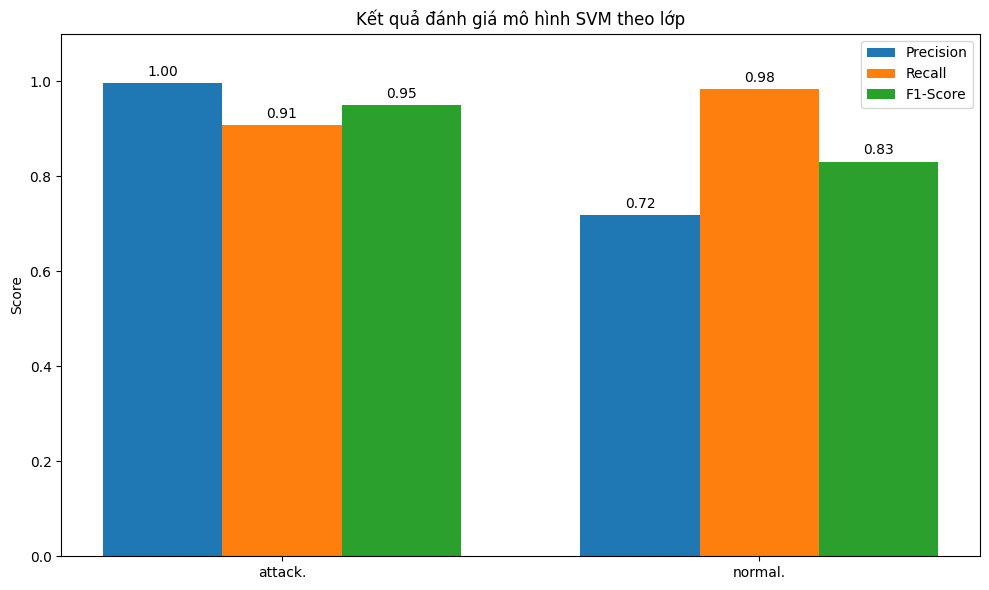

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Select the key metrics for the two classes from the transposed DataFrame
metrics_to_plot = evaluation_df_columnar.loc[['Precision', 'Recall', 'F1-Score'], ['attack.', 'normal.']]

# Get the class labels
labels = metrics_to_plot.columns

# Get the metric names
metric_names = metrics_to_plot.index

# Set the width of the bars
bar_width = 0.25 # Adjust bar width for better visualization

# Set the positions of the bars on the x-axis
x = np.arange(len(labels))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
rects1 = ax.bar(x - bar_width, metrics_to_plot.loc['Precision'], bar_width, label='Precision')
rects2 = ax.bar(x, metrics_to_plot.loc['Recall'], bar_width, label='Recall')
rects3 = ax.bar(x + bar_width, metrics_to_plot.loc['F1-Score'], bar_width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Kết quả đánh giá mô hình SVM theo lớp')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1) # Set y-axis limit to better show scores between 0 and 1
ax.legend()

# Function to auto-label bars with their values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply auto-labeling
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Create an Excel writer object
with pd.ExcelWriter('svm_evaluation_results_formats.xlsx') as writer:
    # Save the original evaluation DataFrame to a sheet named 'Original Table'
    evaluation_df.to_excel(writer, sheet_name='Original Table', index=True)

    # Save the columnar evaluation DataFrame to a sheet named 'Columnar Table'
    evaluation_df_columnar.to_excel(writer, sheet_name='Columnar Table', index=True)

print("Evaluation results in both formats saved to svm_evaluation_results_formats.xlsx")

Evaluation results in both formats saved to svm_evaluation_results_formats.xlsx
